In [1]:
import pyswmm
import numpy as np
import pandas as pd
from swmm_api import read_out_file
from swmm_api import output_file
from swmm_api import read_rpt_file
import matplotlib.pyplot as plt

e:\anaconda3\envs\tensorflow-cpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 准备单张图，然后拼接

## RSH降雨图

In [2]:
erains=np.load('./Step2_Rainfall_design/RSH/east.npy').tolist()
wrains=np.load('./Step2_Rainfall_design/RSH/west.npy').tolist()
# 转化为数组
ers,wrs=[],[]
for i in range(len(erains)):
    teme,temw=[],[]
    for j in range(len(erains[i])):
        teme.append(float(erains[i][j][1]))
        temw.append(float(wrains[i][j][1]))
    ers.append(teme)
    wrs.append(temw)

ers=np.array(ers)
wrs=np.array(wrs)

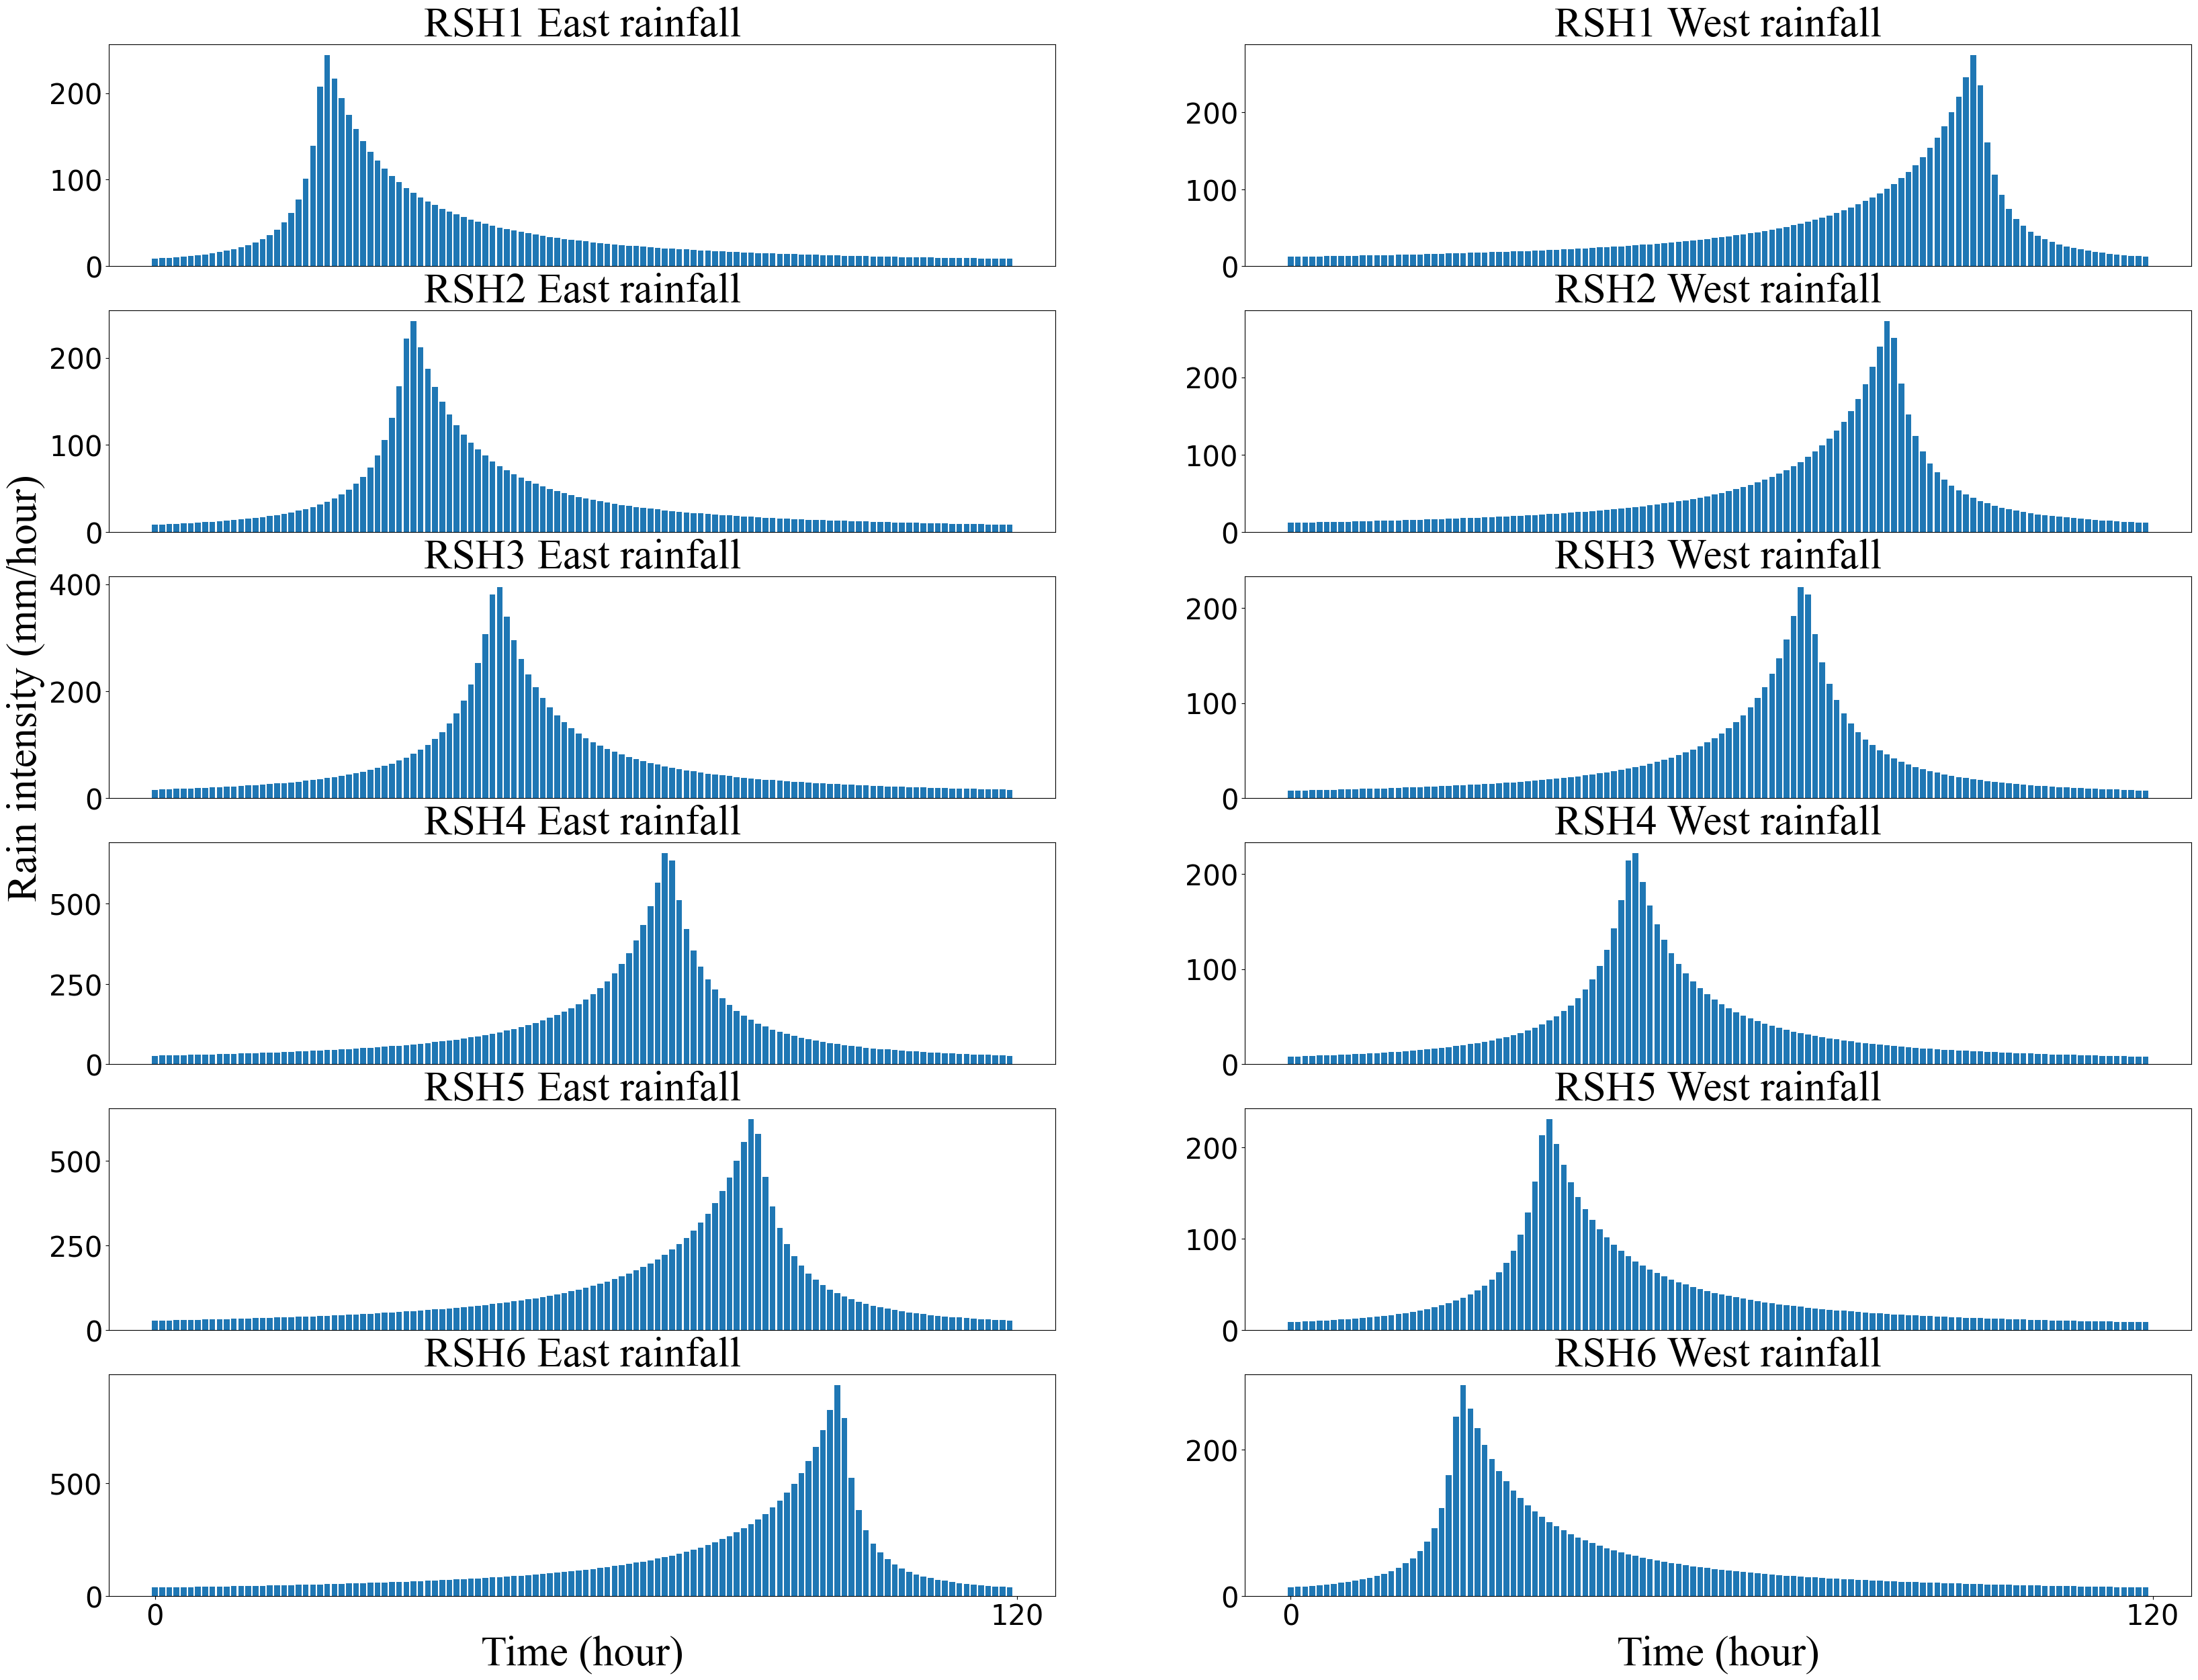

In [3]:
font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
fig,ax=plt.subplots(6,2,figsize=(40,30))

for i in range(len(erains)):
    ax[i][0].bar([x for x in range(ers.shape[1])],ers[i,:])
    ax[i][0].set_title('RSH'+str(i+1)+' East rainfall',font=font1)
    ax[i][1].bar([x for x in range(wrs.shape[1])],wrs[i,:])
    ax[i][1].set_title('RSH'+str(i+1)+' West rainfall',font=font1)

    ax[i][0].tick_params(axis='y',labelsize=30)
    ax[i][1].tick_params(axis='y',labelsize=30)
    if i ==5:
        ax[i][0].set_xticks([0,120])
        ax[i][1].set_xticks([0,120])
        ax[i][0].tick_params(axis='x',labelsize=30)
        ax[i][1].tick_params(axis='x',labelsize=30)
        ax[i][0].set_xlabel('Time (hour)',font=font1)
        ax[i][1].set_xlabel('Time (hour)',font=font1)
    else:
        ax[i][0].set_xticks([])
        ax[i][1].set_xticks([])

    if i==2:
        ax[i][0].set_ylabel('Rain intensity (mm/hour)',font=font1)

plt.savefig('./Figs/rainfall.png',dpi=300,bbox_inches='tight')

# FC结果图

## RSH的所有控制过程数据


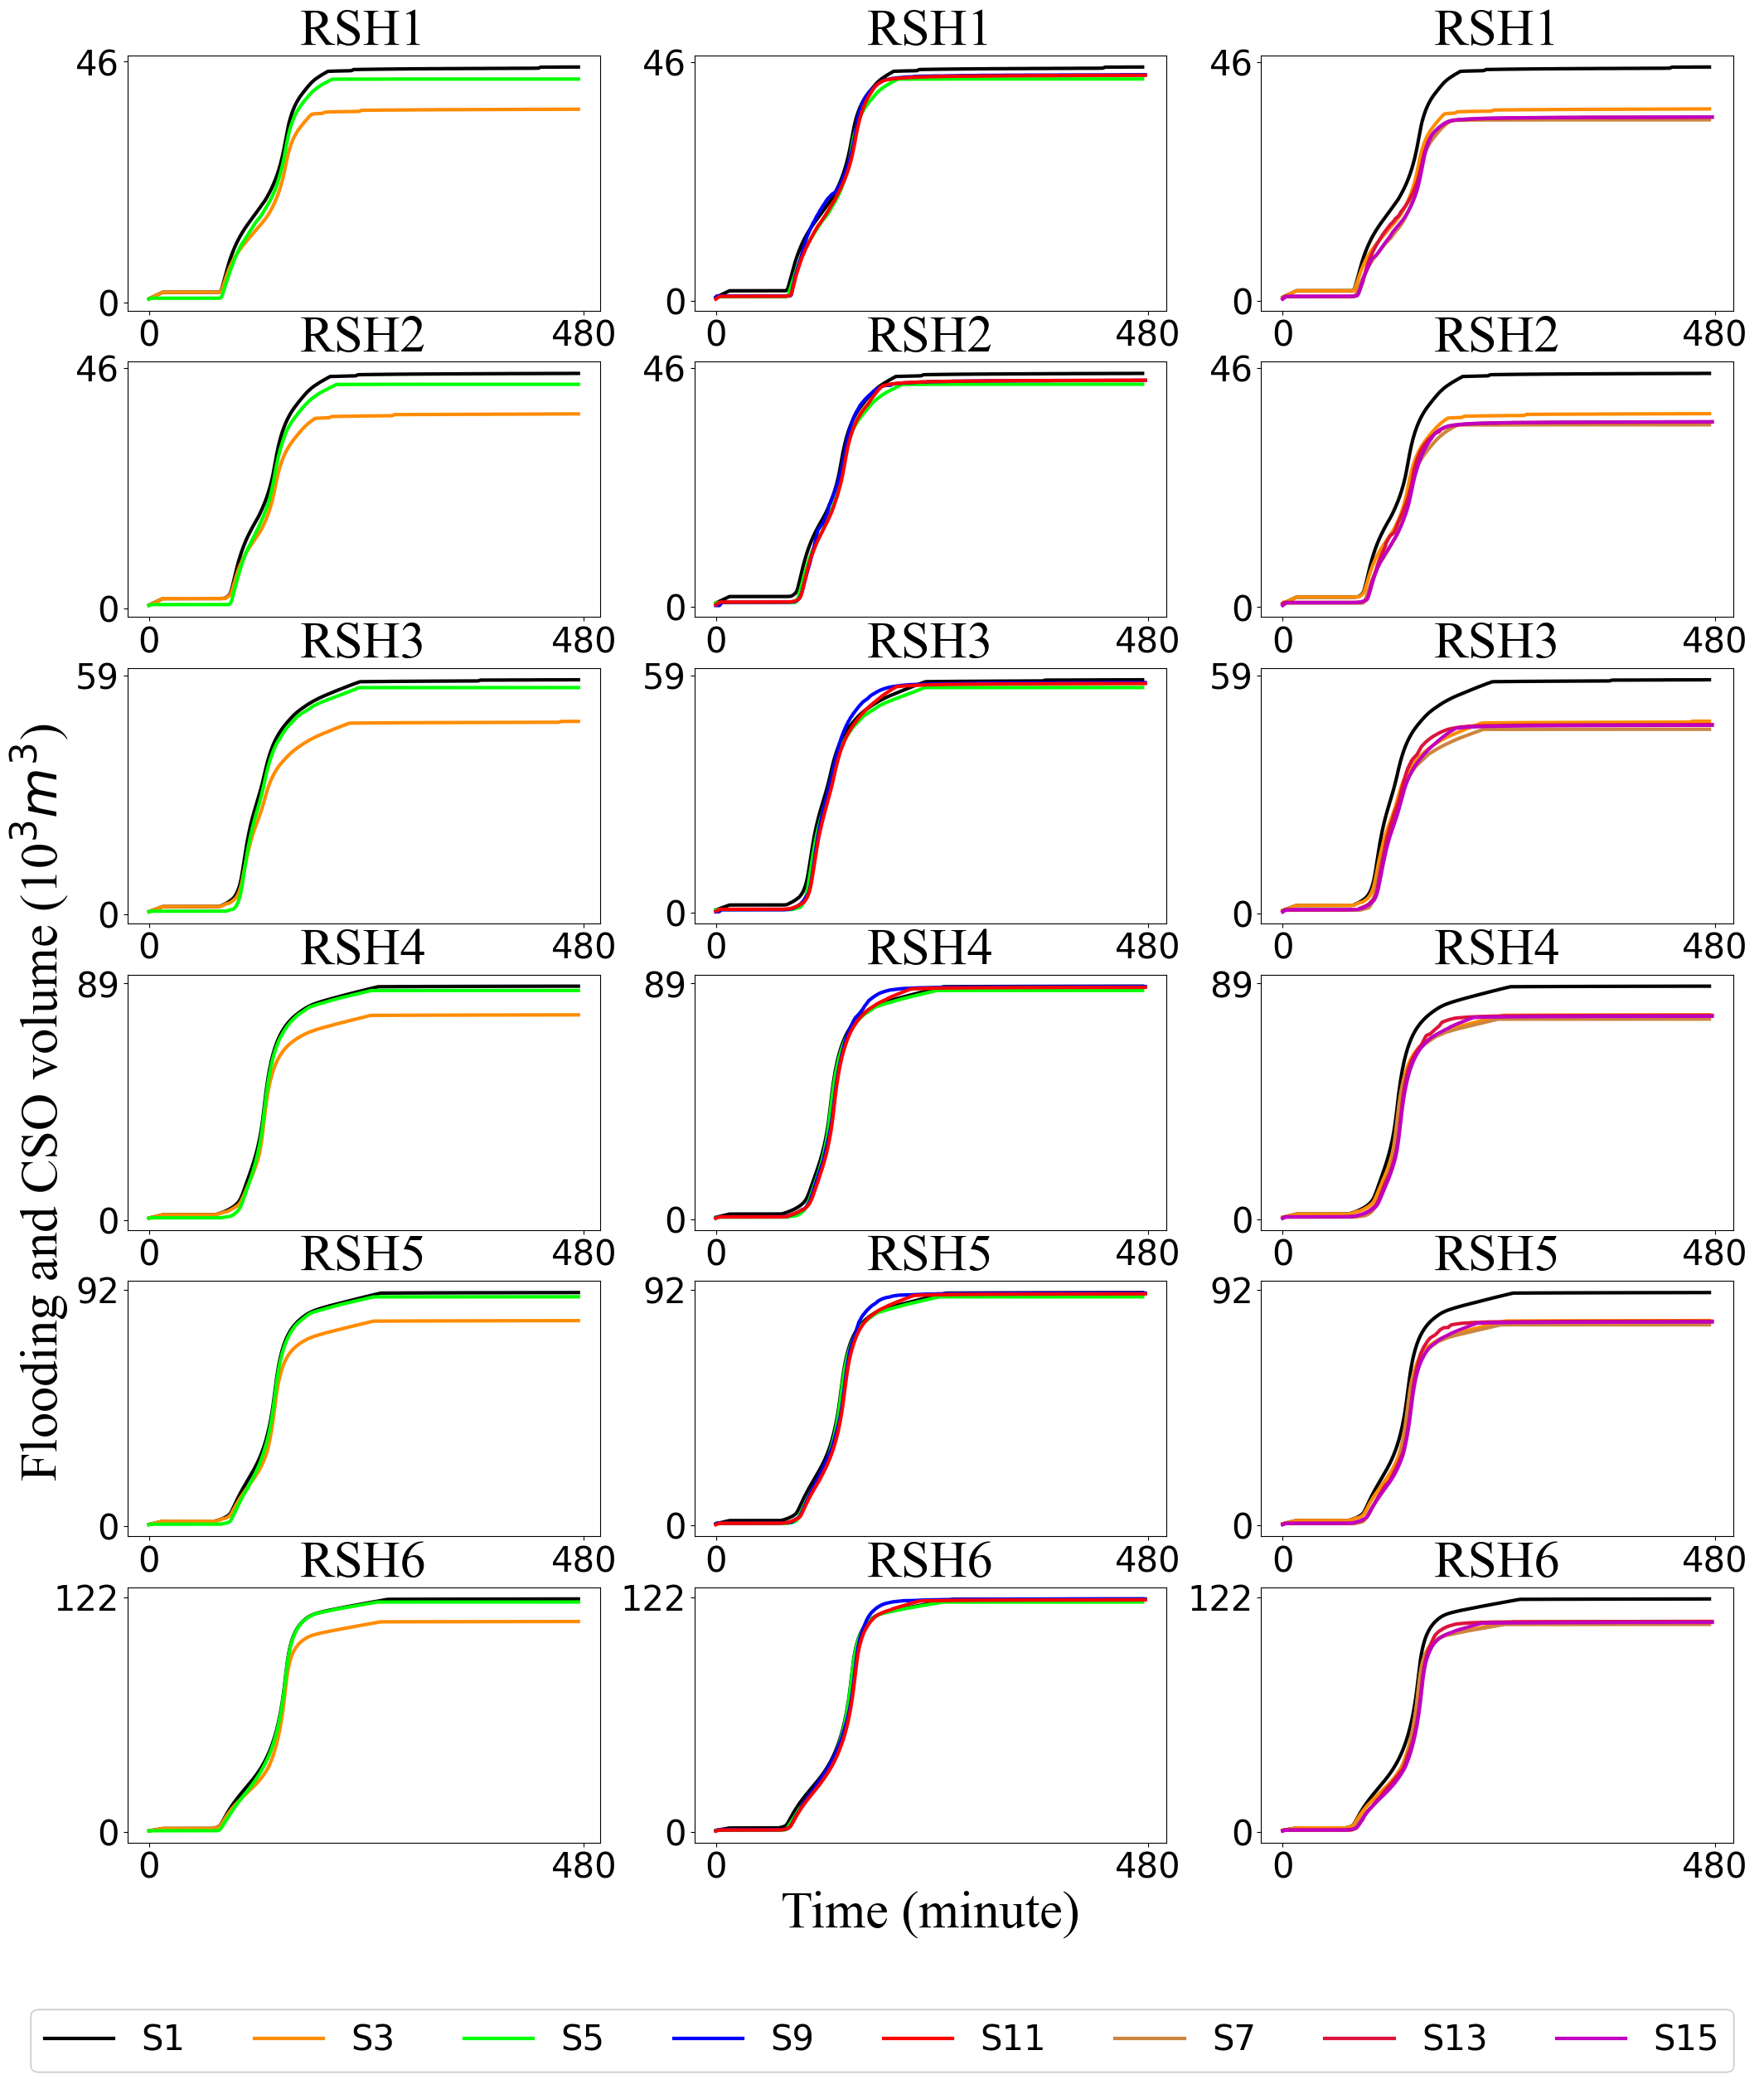

In [10]:
# RSH的所有控制过程数据： S1,3,5,7,9,11

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S3/Results/','./Step3_1_S1-S8/S5/Results/'],
       ['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S5/Results/','./Step4_RTC_PPO_noGI/PPO/Results/RSH/','./Step4_RTC_DDQN_noGI/DDQN/Results/RSH/'],
       ['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S3/Results/','./Step3_1_S1-S8/S7/Results/','./Step4_RTC_PPO/PPO/Results/RSH/','./Step4_RTC_DDQN/DDQN/Results/RSH/']
]
names=[['S1: without GI and RTC','S3: with GI','S5: with HC'],
       ['S1: without GI and RTC','S5: with HC','S9: with PPO','S11: with DDQN'],
       ['S1: without GI and RTC','S3: with GI','S7: with GI and HC','S13: with GI and PPO','S15: with GI and DDQN']
]
names=[['S1','S3','S5'],
       ['S1','S5','S9','S11'],
       ['S1','S3','S7','S13','S15']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#FF8C00','#CD853F','#DC143C','#C000C0']]

legends=[['S1','S3','S5'],
         ['S1','S5','S9','S11'],
         ['S1','S3','S7','S13','S15']
]


legends_log={'S1':False,'S3':False,'S5':False,'S7':False,'S9':False,'S11':False,'S13':False,'S15':False}

fig,ax=plt.subplots(6,3,figsize=(25,28))
i,j=0,0
for i in range(6):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):
            data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            te=np.array(data['F'])+np.array(data['C'])
            if legends_log[legends[j][s]]:
                ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            else:
                ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
                legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=30)
        ax[i][j].tick_params(axis='x',labelsize=30)
        ax[i][j].set_title('RSH'+str(i+1),font=font1)
        ax[i][j].set_xticks([0,480],[0,480])
        ax[i][j].set_yticks([0,max_num+1000],[0,round((max_num+1000)/1000)])

    fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==3:
        ax[i][0].set_ylabel('Flooding and CSO volume (10'+'$^{3}$'+'$m^{3}$'+')',font=font1)

    if i ==5:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    

plt.savefig('./Figs/FC_RSH.png',dpi=300,bbox_inches='tight')

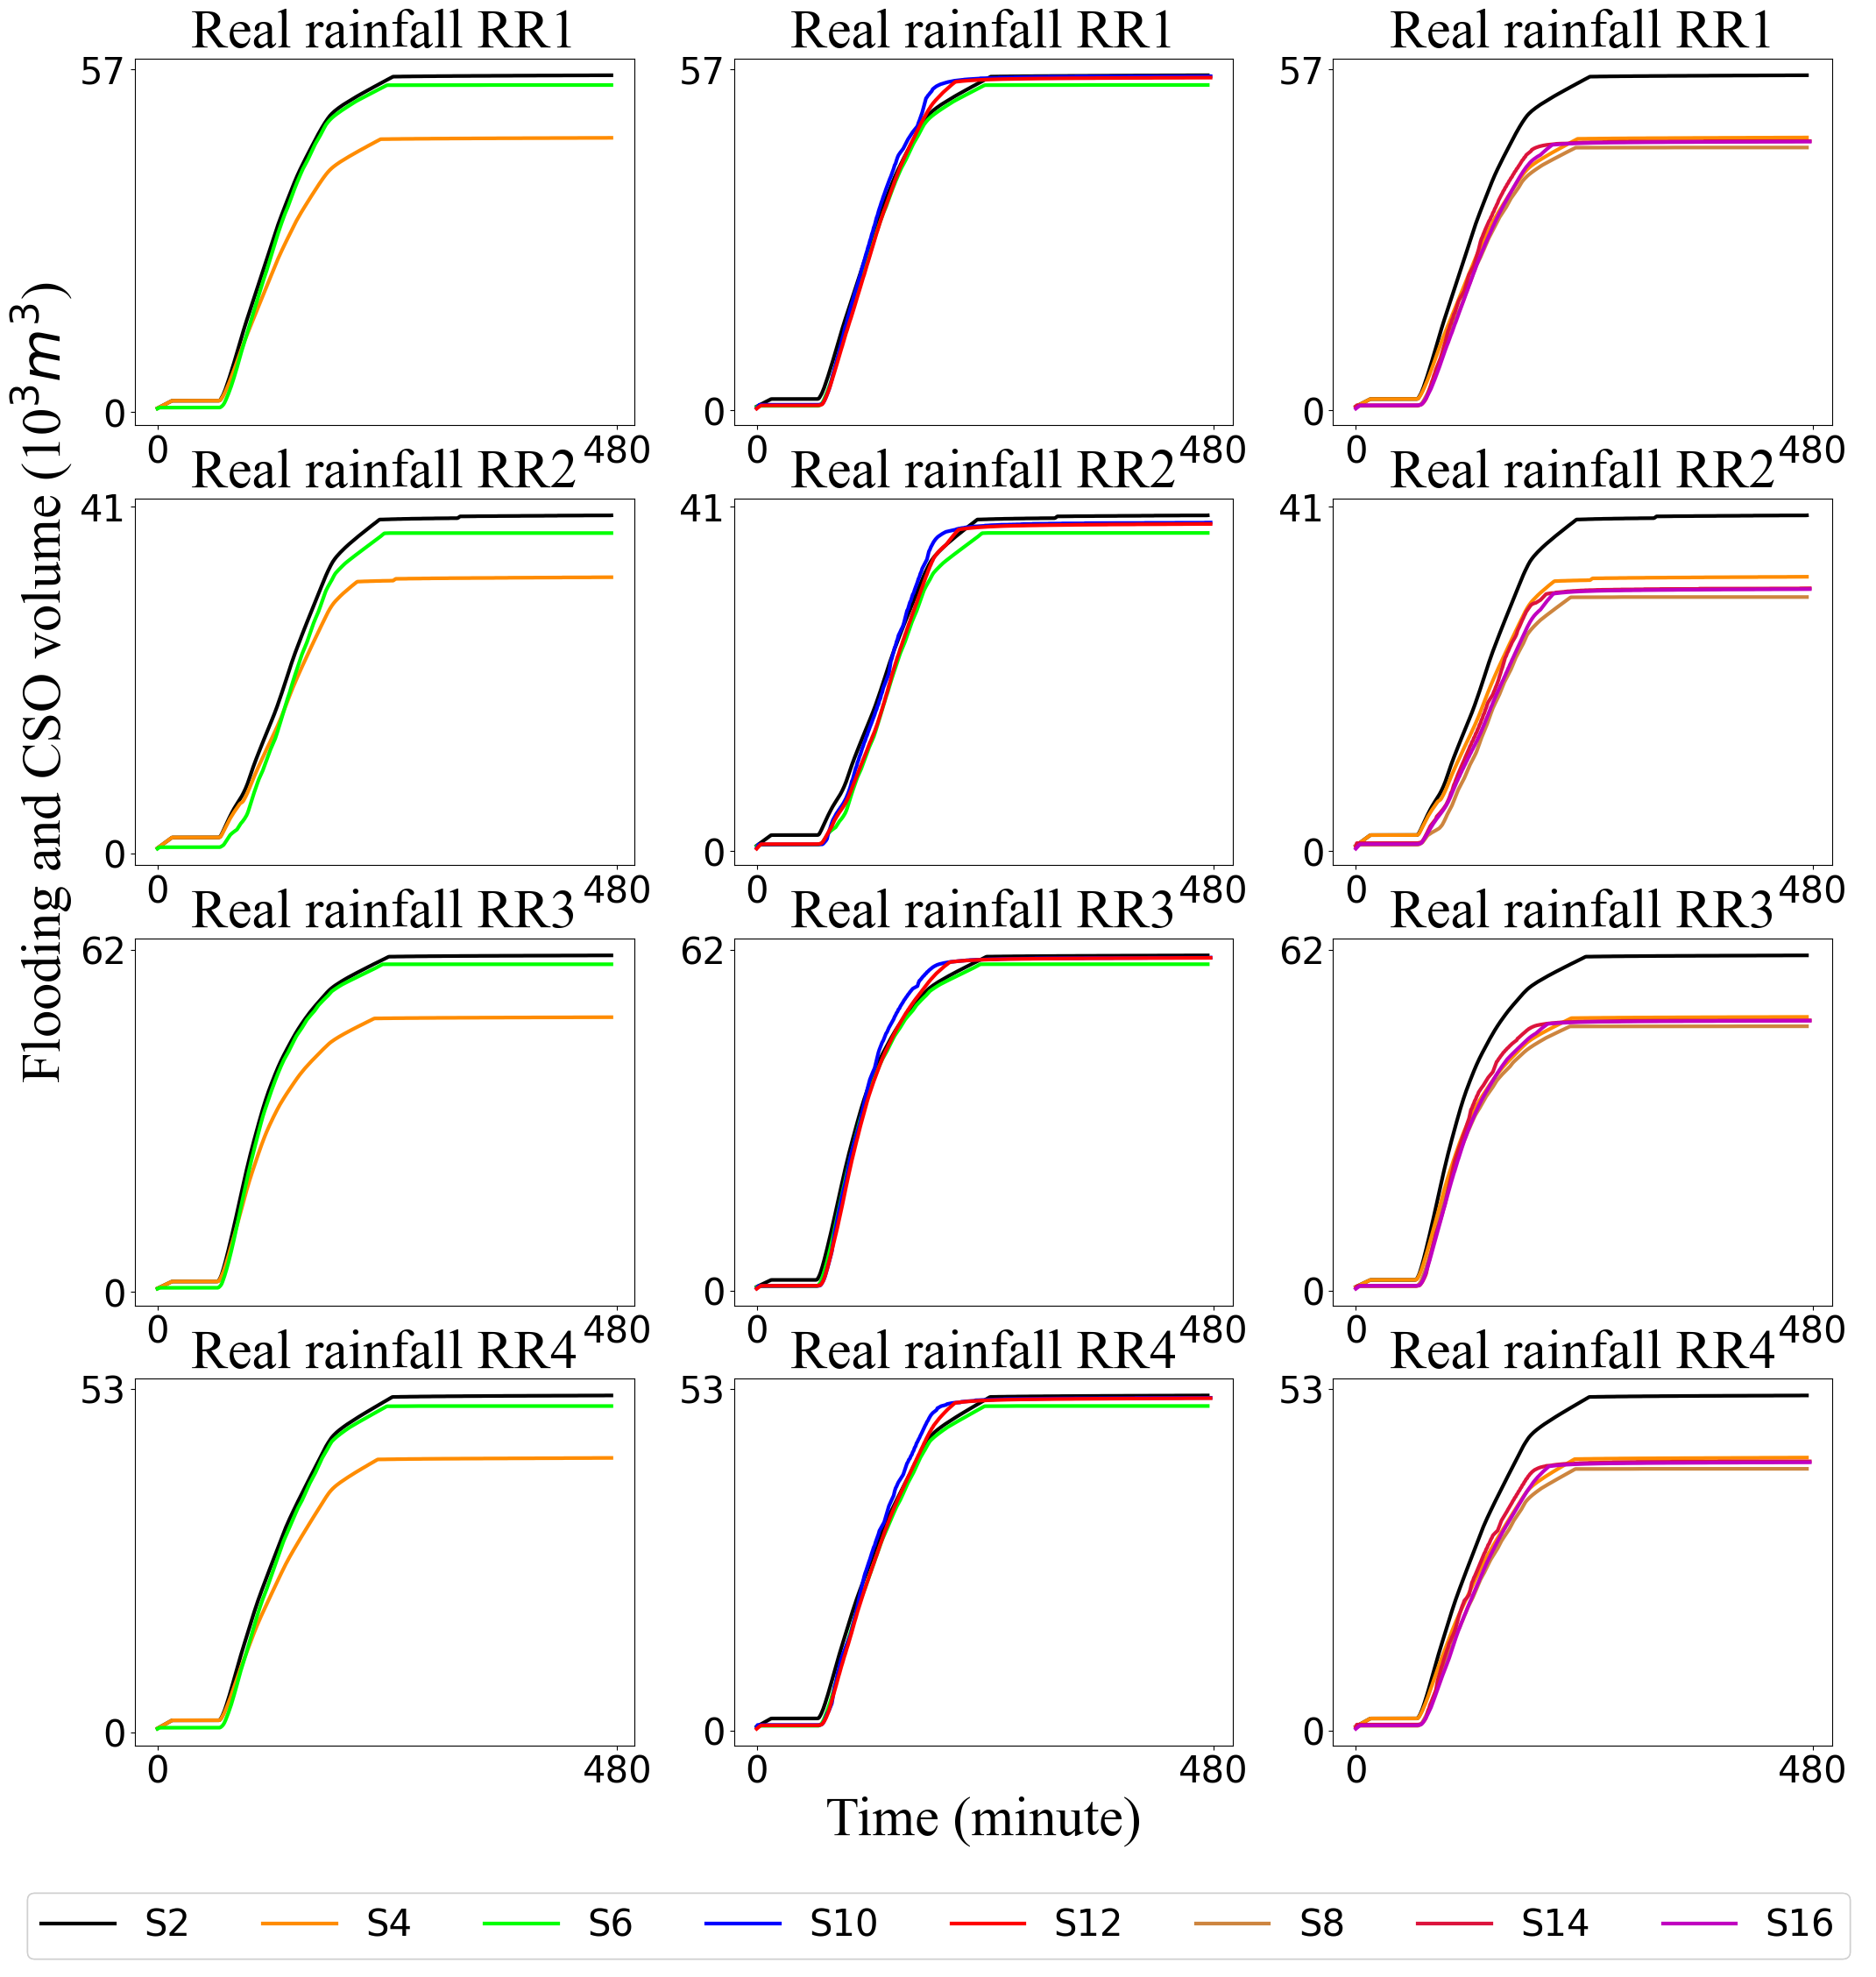

In [16]:
# RR的所有控制过程数据： 

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S2/Results/','./Step3_1_S1-S8/S4/Results/','./Step3_1_S1-S8/S6/Results/'],
       ['./Step3_1_S1-S8/S2/Results/','./Step3_1_S1-S8/S6/Results/','./Step4_RTC_PPO_noGI/PPO/Results/RR/','./Step4_RTC_DDQN_noGI/DDQN/Results/RR/'],
       ['./Step3_1_S1-S8/S2/Results/','./Step3_1_S1-S8/S4/Results/','./Step3_1_S1-S8/S8/Results/','./Step4_RTC_PPO/PPO/Results/RR/','./Step4_RTC_DDQN/DDQN/Results/RR/']
]
names=[['S2: without GI and RTC','S4: with GI','S6: with HC'],
       ['S2: without GI and RTC','S6: with HC','S10: with PPO','S12: with DDQN'],
       ['S2: without GI and RTC','S4: with GI','S8: with GI and HC','S14: with GI and PPO','S16: with GI and DDQN']
]

names=[['S2','S4','S6'],
       ['S2','S6','S10','S12'],
       ['S2','S4','S8','S14','S16']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#FF8C00','#CD853F','#DC143C','#C000C0']]

legends=[['S2','S4','S6'],
       ['S2','S6','S10','S12'],
       ['S2','S4','S8','S14','S16']
]

legends_log={'S2':False,'S4':False,'S6':False,'S8':False,'S10':False,'S12':False,'S14':False,'S16':False}

fig,ax=plt.subplots(4,3,figsize=(25,25))
i,j=0,0
for i in range(4):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):
            data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            te=np.array(data['F'])+np.array(data['C'])
            if legends_log[legends[j][s]]:
                ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            else:
                ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
                legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=30)
        ax[i][j].tick_params(axis='x',labelsize=30)
        ax[i][j].set_title('Real rainfall RR'+str(i+1),font=font1)
        ax[i][j].set_xticks([0,480],[0,480])
        ax[i][j].set_yticks([0,max_num+1000],[0,round((max_num+1000)/1000)])

    fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==1:
        ax[i][0].set_ylabel('Flooding and CSO volume (10'+'$^{3}$'+'$m^{3}$'+')',font=font1)

    if i ==3:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    

plt.savefig('./Figs/FC_RR.png',dpi=300,bbox_inches='tight')

# Res结果图

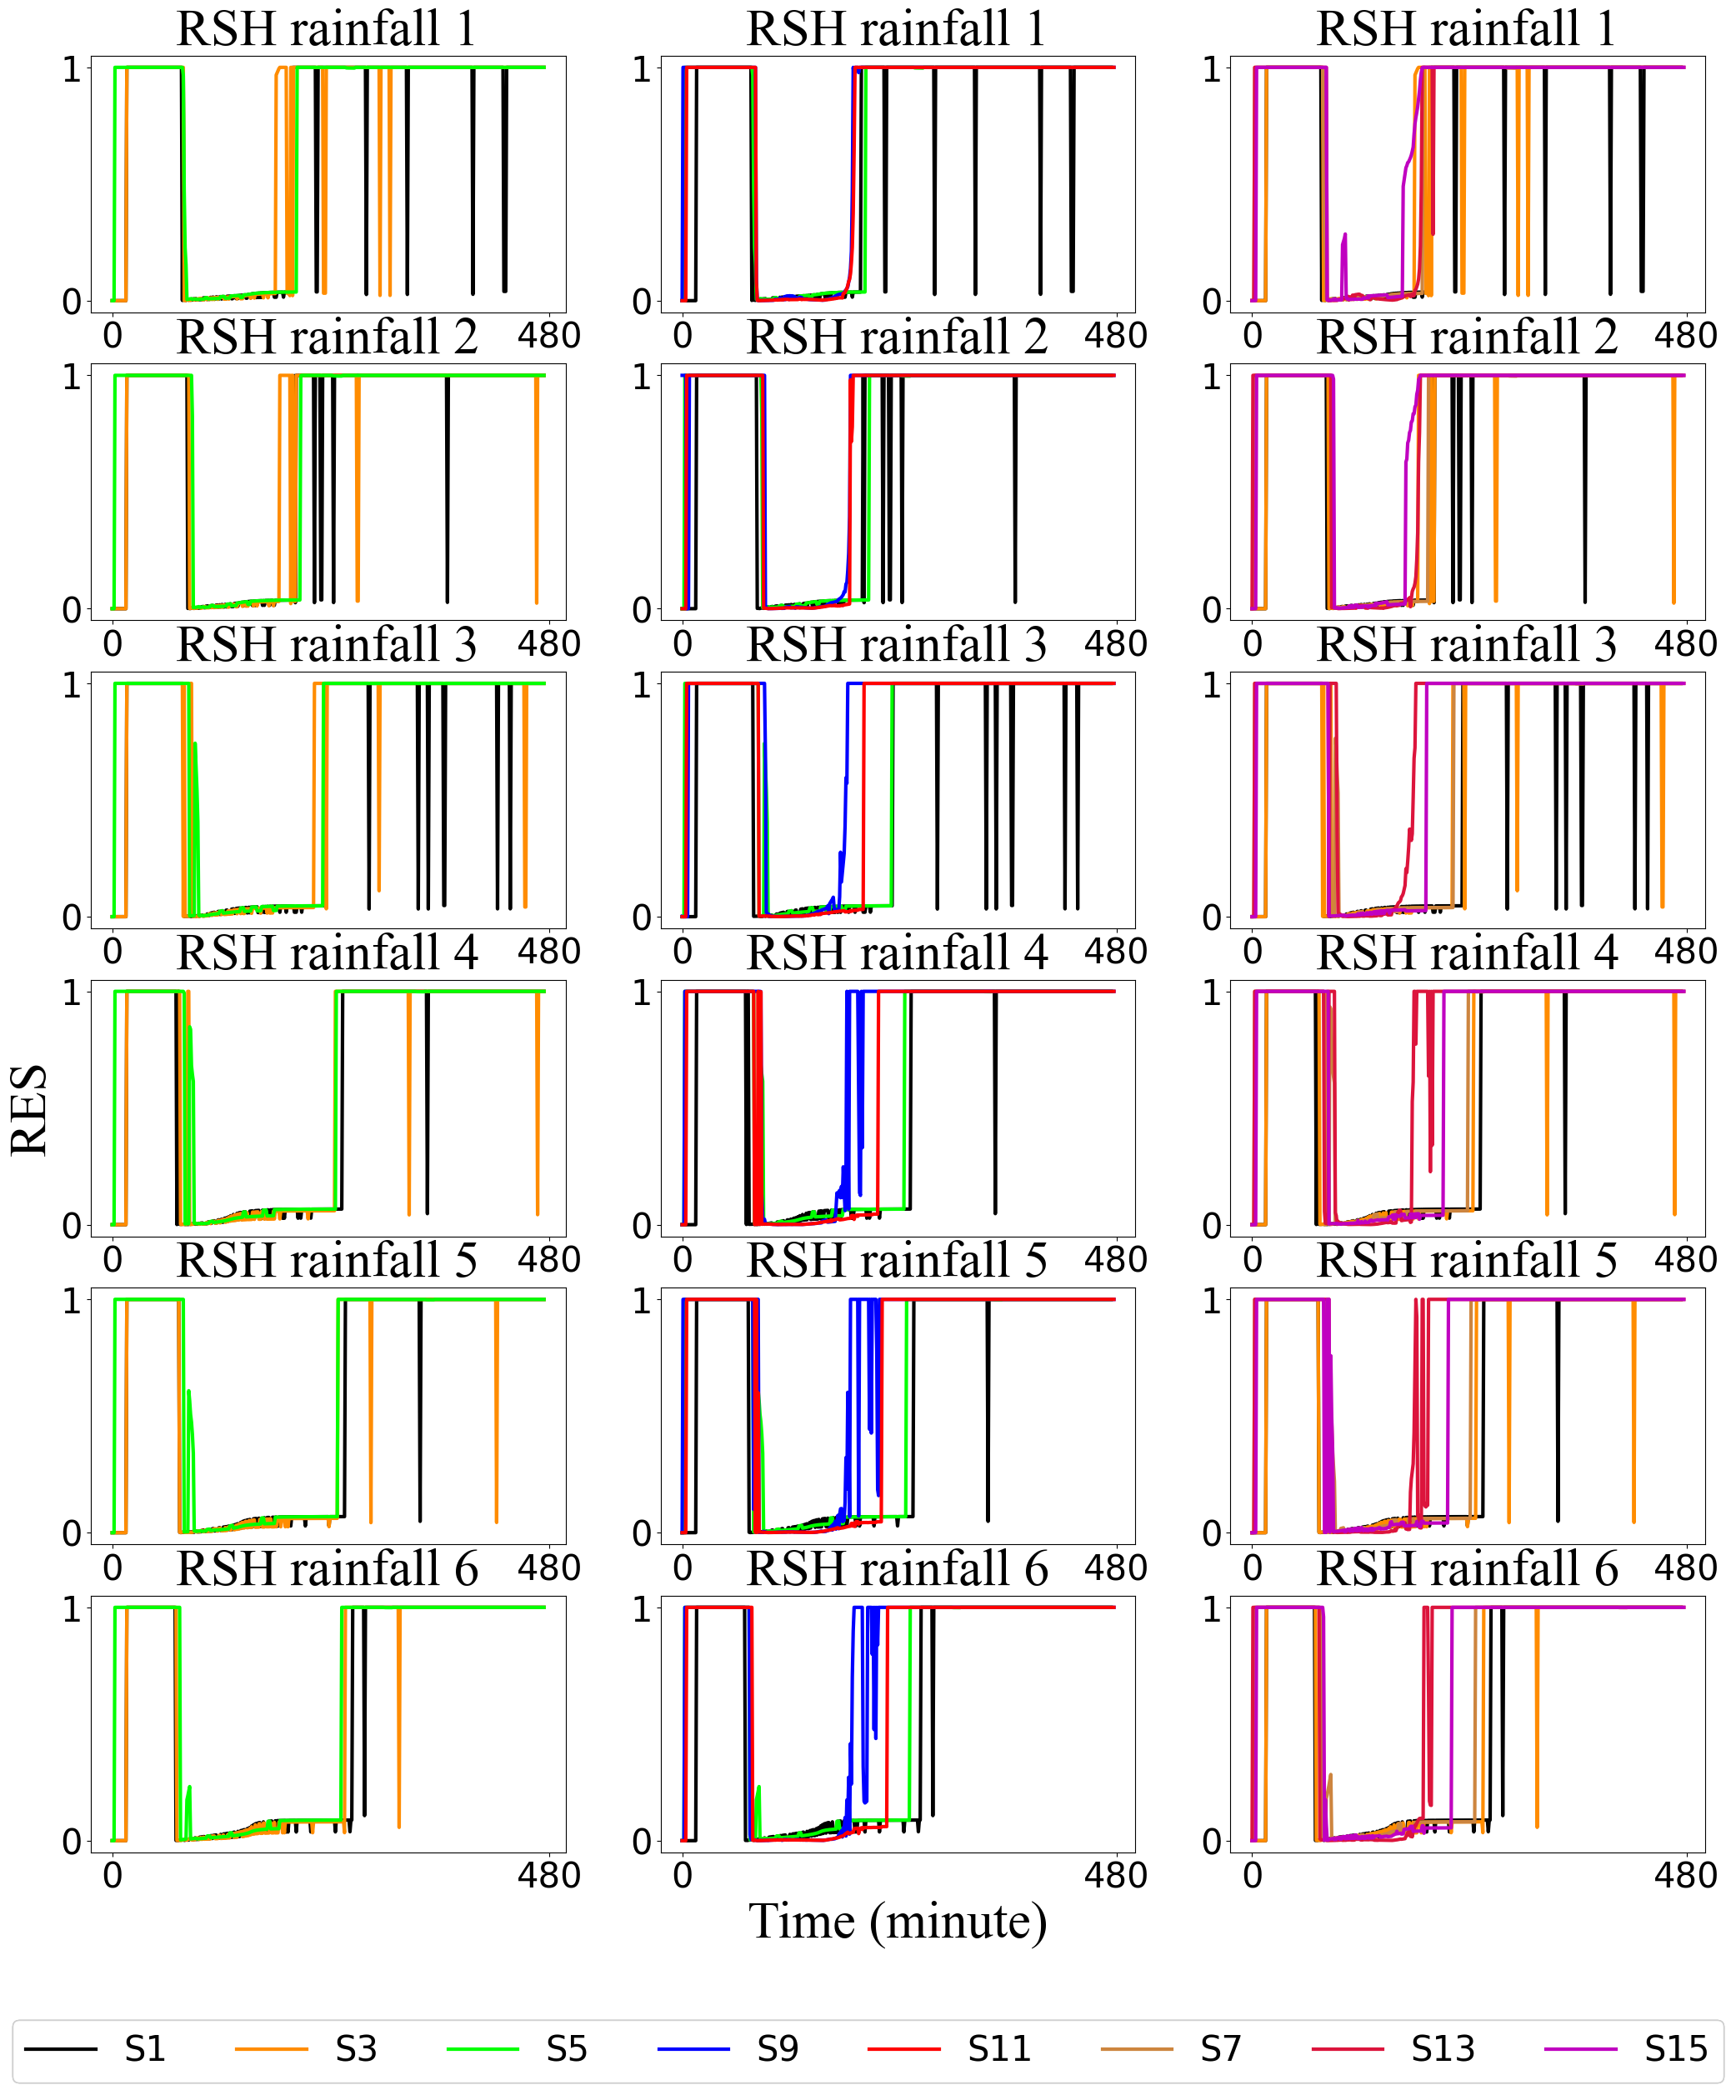

In [12]:
# RSH的所有控制过程数据： S1,3,5,7,9,11

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S3/Results/','./Step3_1_S1-S8/S5/Results/'],
       ['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S5/Results/','./Step4_RTC_PPO_noGI/PPO/Results/RSH/','./Step4_RTC_DDQN_noGI/DDQN/Results/RSH/'],
       ['./Step3_1_S1-S8/S1/Results/','./Step3_1_S1-S8/S3/Results/','./Step3_1_S1-S8/S7/Results/','./Step4_RTC_PPO/PPO/Results/RSH/','./Step4_RTC_DDQN/DDQN/Results/RSH/']
]
names=[['S1: without GI and RTC','S3: with GI','S5: with HC'],
       ['S1: without GI and RTC','S5: with HC','S9: with PPO','S11: with DDQN'],
       ['S1: without GI and RTC','S3: with GI','S7: with GI and HC','S13: with GI and PPO','S15: with GI and DDQN']
]
names=[['S1','S3','S5'],
       ['S1','S5','S9','S11'],
       ['S1','S3','S7','S13','S15']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#FF8C00','#CD853F','#DC143C','#C000C0']]

legends=[['S1','S3','S5'],
         ['S1','S5','S9','S11'],
         ['S1','S3','S7','S13','S15']
]


legends_log={'S1':False,'S3':False,'S5':False,'S7':False,'S9':False,'S11':False,'S13':False,'S15':False}

fig,ax=plt.subplots(6,3,figsize=(25,28))
i,j=0,0
for i in range(6):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):
            data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            te=np.array(data['RES'])
            if legends_log[legends[j][s]]:
                ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            else:
                ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
                legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=30)
        ax[i][j].tick_params(axis='x',labelsize=30)
        ax[i][j].set_title('RSH rainfall '+str(i+1),font=font1)
        ax[i][j].set_xticks([0,480],[0,480])
        ax[i][j].set_yticks([0,1],[0,1])

    fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==3:
        ax[i][0].set_ylabel('RES',font=font1)

    if i ==5:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    

plt.savefig('./Figs/RES_RSH.png',dpi=300,bbox_inches='tight')

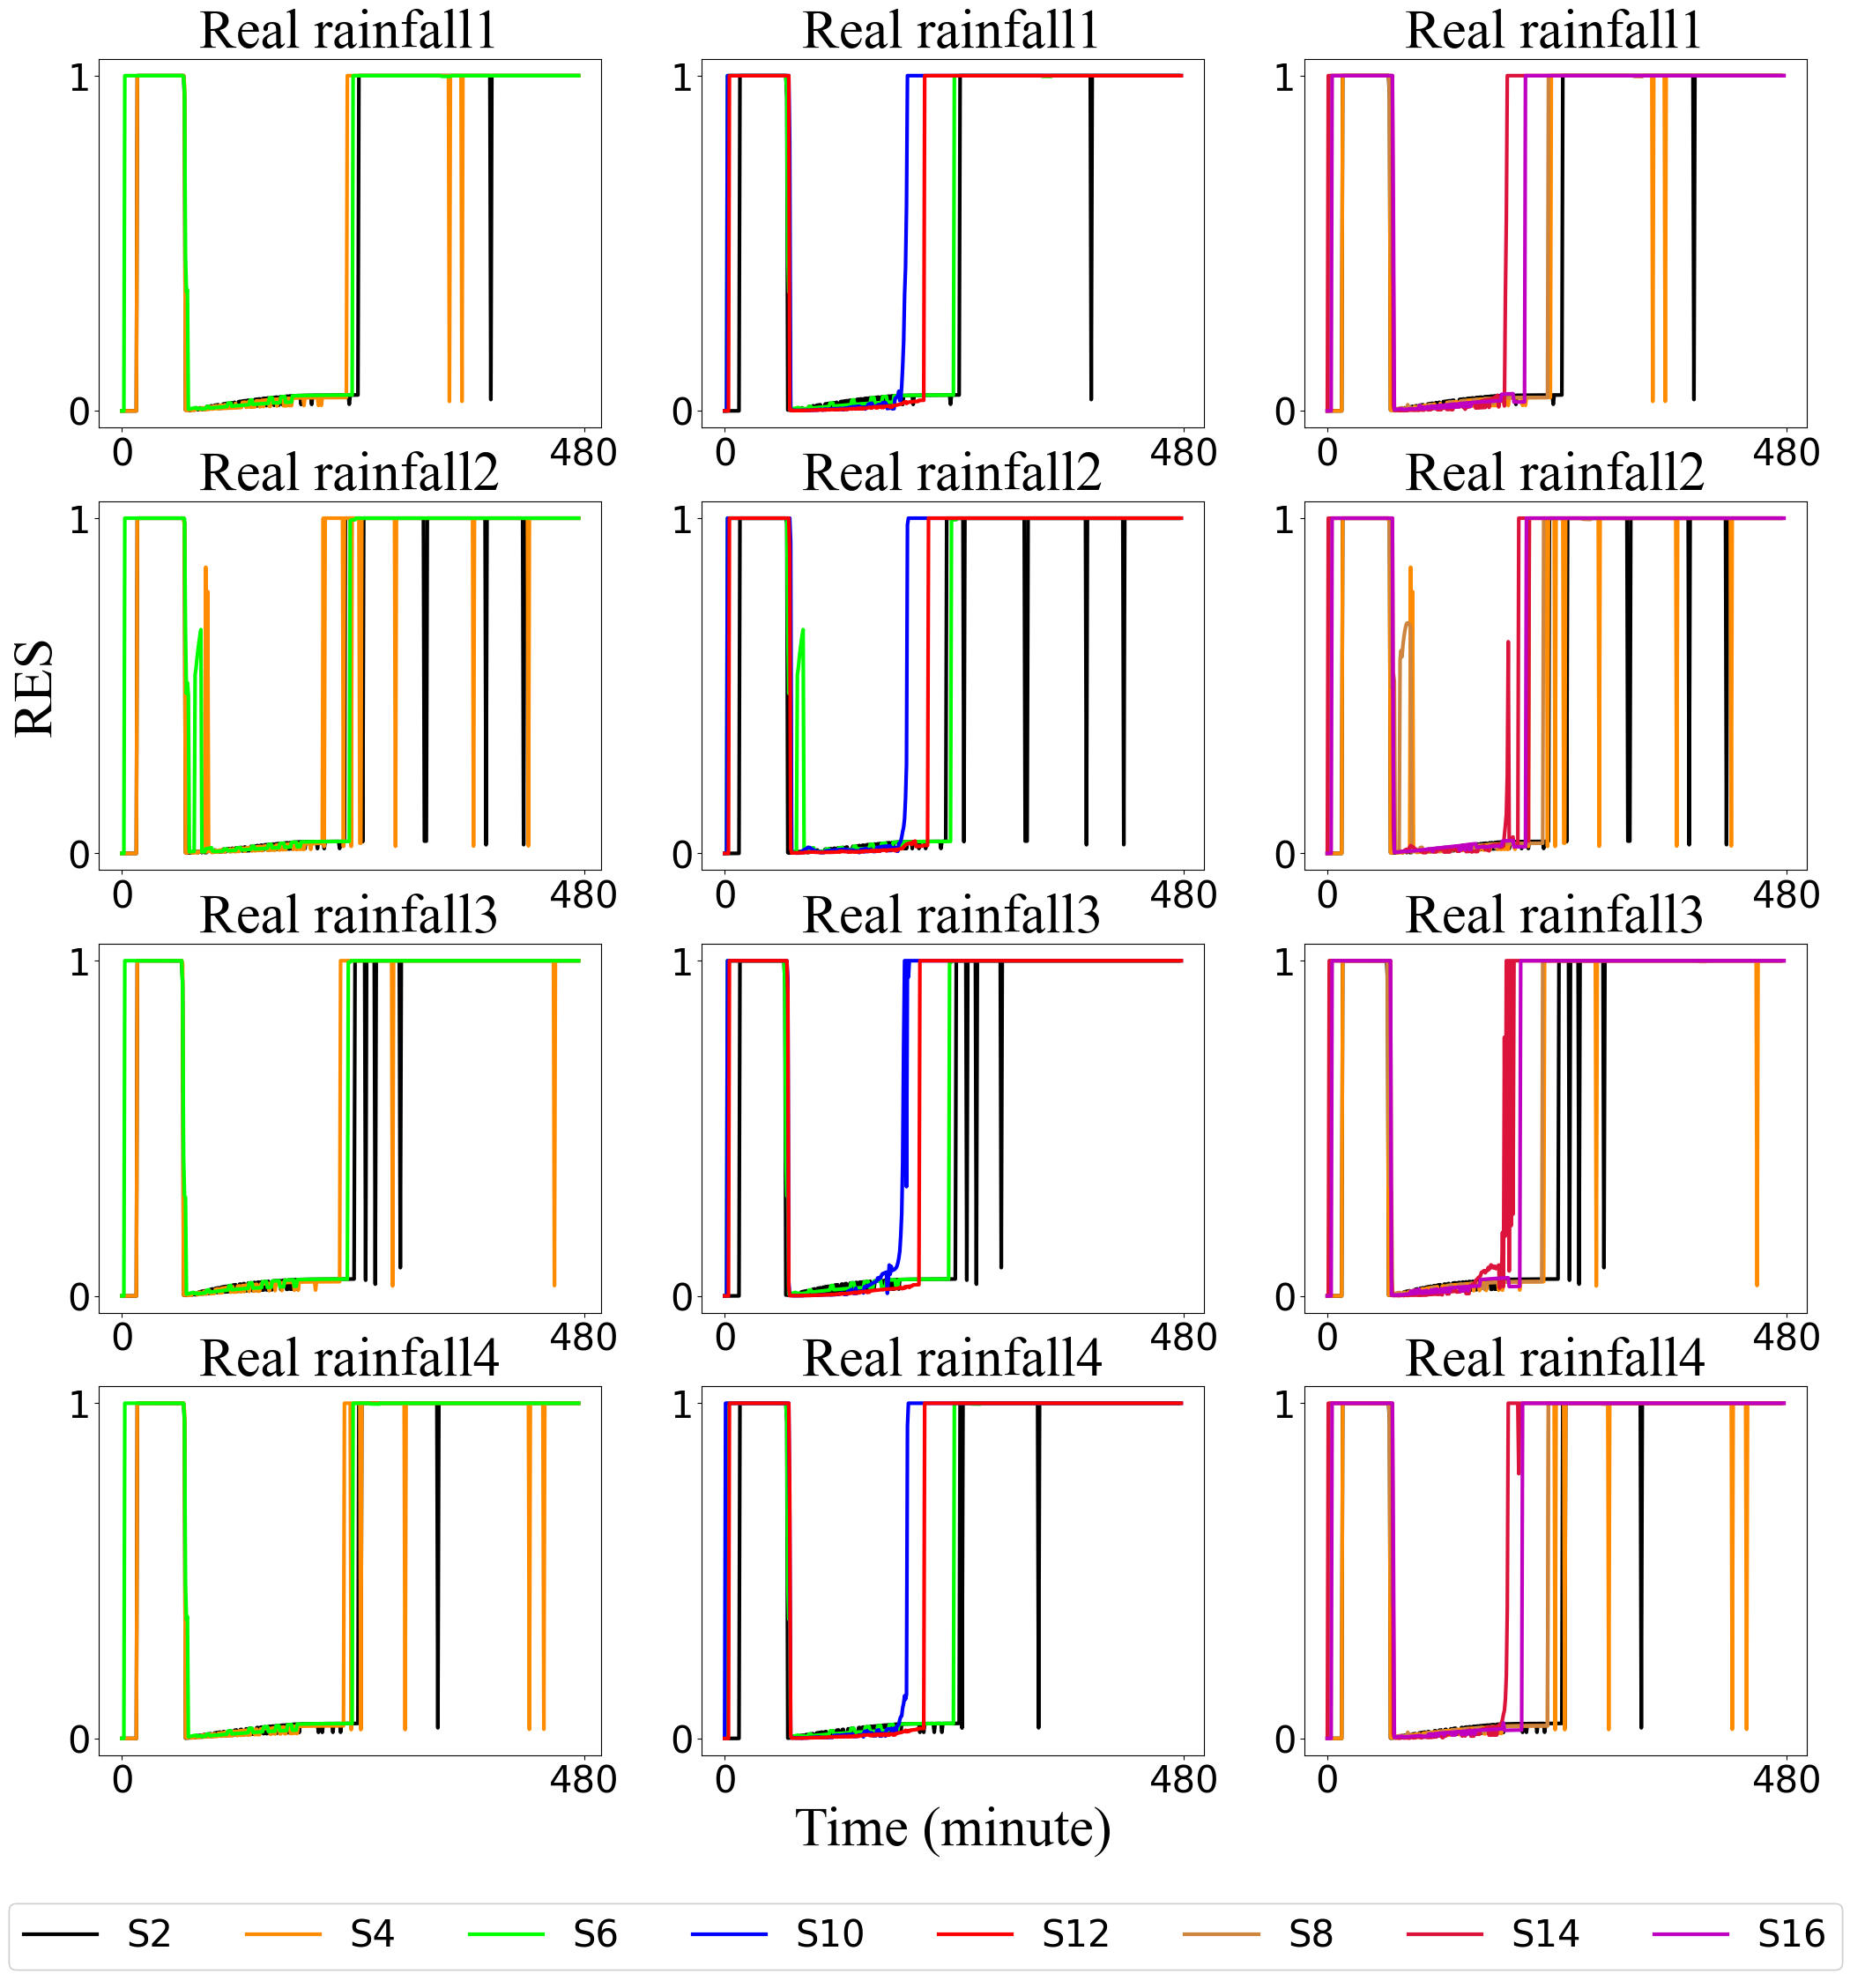

In [17]:
# RR的所有控制过程数据： 

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=[['./Step3_1_S1-S8/S2/Results/','./Step3_1_S1-S8/S4/Results/','./Step3_1_S1-S8/S6/Results/'],
       ['./Step3_1_S1-S8/S2/Results/','./Step3_1_S1-S8/S6/Results/','./Step4_RTC_PPO_noGI/PPO/Results/RR/','./Step4_RTC_DDQN_noGI/DDQN/Results/RR/'],
       ['./Step3_1_S1-S8/S2/Results/','./Step3_1_S1-S8/S4/Results/','./Step3_1_S1-S8/S8/Results/','./Step4_RTC_PPO/PPO/Results/RR/','./Step4_RTC_DDQN/DDQN/Results/RR/']
]
names=[['S2: without GI and RTC','S4: with GI','S6: with HC'],
       ['S2: without GI and RTC','S6: with HC','S10: with PPO','S12: with DDQN'],
       ['S2: without GI and RTC','S4: with GI','S8: with GI and HC','S14: with GI and PPO','S16: with GI and DDQN']
]

names=[['S2','S4','S6'],
       ['S2','S6','S10','S12'],
       ['S2','S4','S8','S14','S16']
]
colors=[['#000000','#FF8C00','#00FF00'],
        ['#000000','#00FF00','#0000FF','#FF0000'],
        ['#000000','#FF8C00','#CD853F','#DC143C','#C000C0']]

legends=[['S2','S4','S6'],
       ['S2','S6','S10','S12'],
       ['S2','S4','S8','S14','S16']
]

legends_log={'S2':False,'S4':False,'S6':False,'S8':False,'S10':False,'S12':False,'S14':False,'S16':False}

fig,ax=plt.subplots(4,3,figsize=(25,25))
i,j=0,0
for i in range(4):

    #3张图，S1+S3+S5，说明GI与RTC分别作用；S1+S5+S9+S11对比3种RTC；S3+S7+S13+S15单靠GI不好用
    for j in range(3):
        max_num=0.0
        for s in range(len(items[j])):
            data=np.load(items[j][s]+str(i)+'.npy',allow_pickle=True).tolist()
            te=np.array(data['RES'])
            if legends_log[legends[j][s]]:
                ax[i][j].plot(te, linewidth=3, color=colors[j][s])
            else:
                ax[i][j].plot(te, label=names[j][s], linewidth=3, color=colors[j][s])
                legends_log[legends[j][s]]=True
            max_num=np.max([max_num,np.max(te)])
        #ax[i][j].legend(fontsize=20)
        ax[i][j].tick_params(axis='y',labelsize=30)
        ax[i][j].tick_params(axis='x',labelsize=30)
        ax[i][j].set_title('Real rainfall'+str(i+1),font=font1)
        ax[i][j].set_xticks([0,480],[0,480])
        ax[i][j].set_yticks([0,1],[0,1])

    fig.legend(fontsize=30,loc='lower center',ncol=8)

    if i==1:
        ax[i][0].set_ylabel('RES',font=font1)

    if i ==3:
        ax[i][1].set_xlabel('Time (minute)',font=font1)
    

plt.savefig('./Figs/RES_RR.png',dpi=300,bbox_inches='tight')

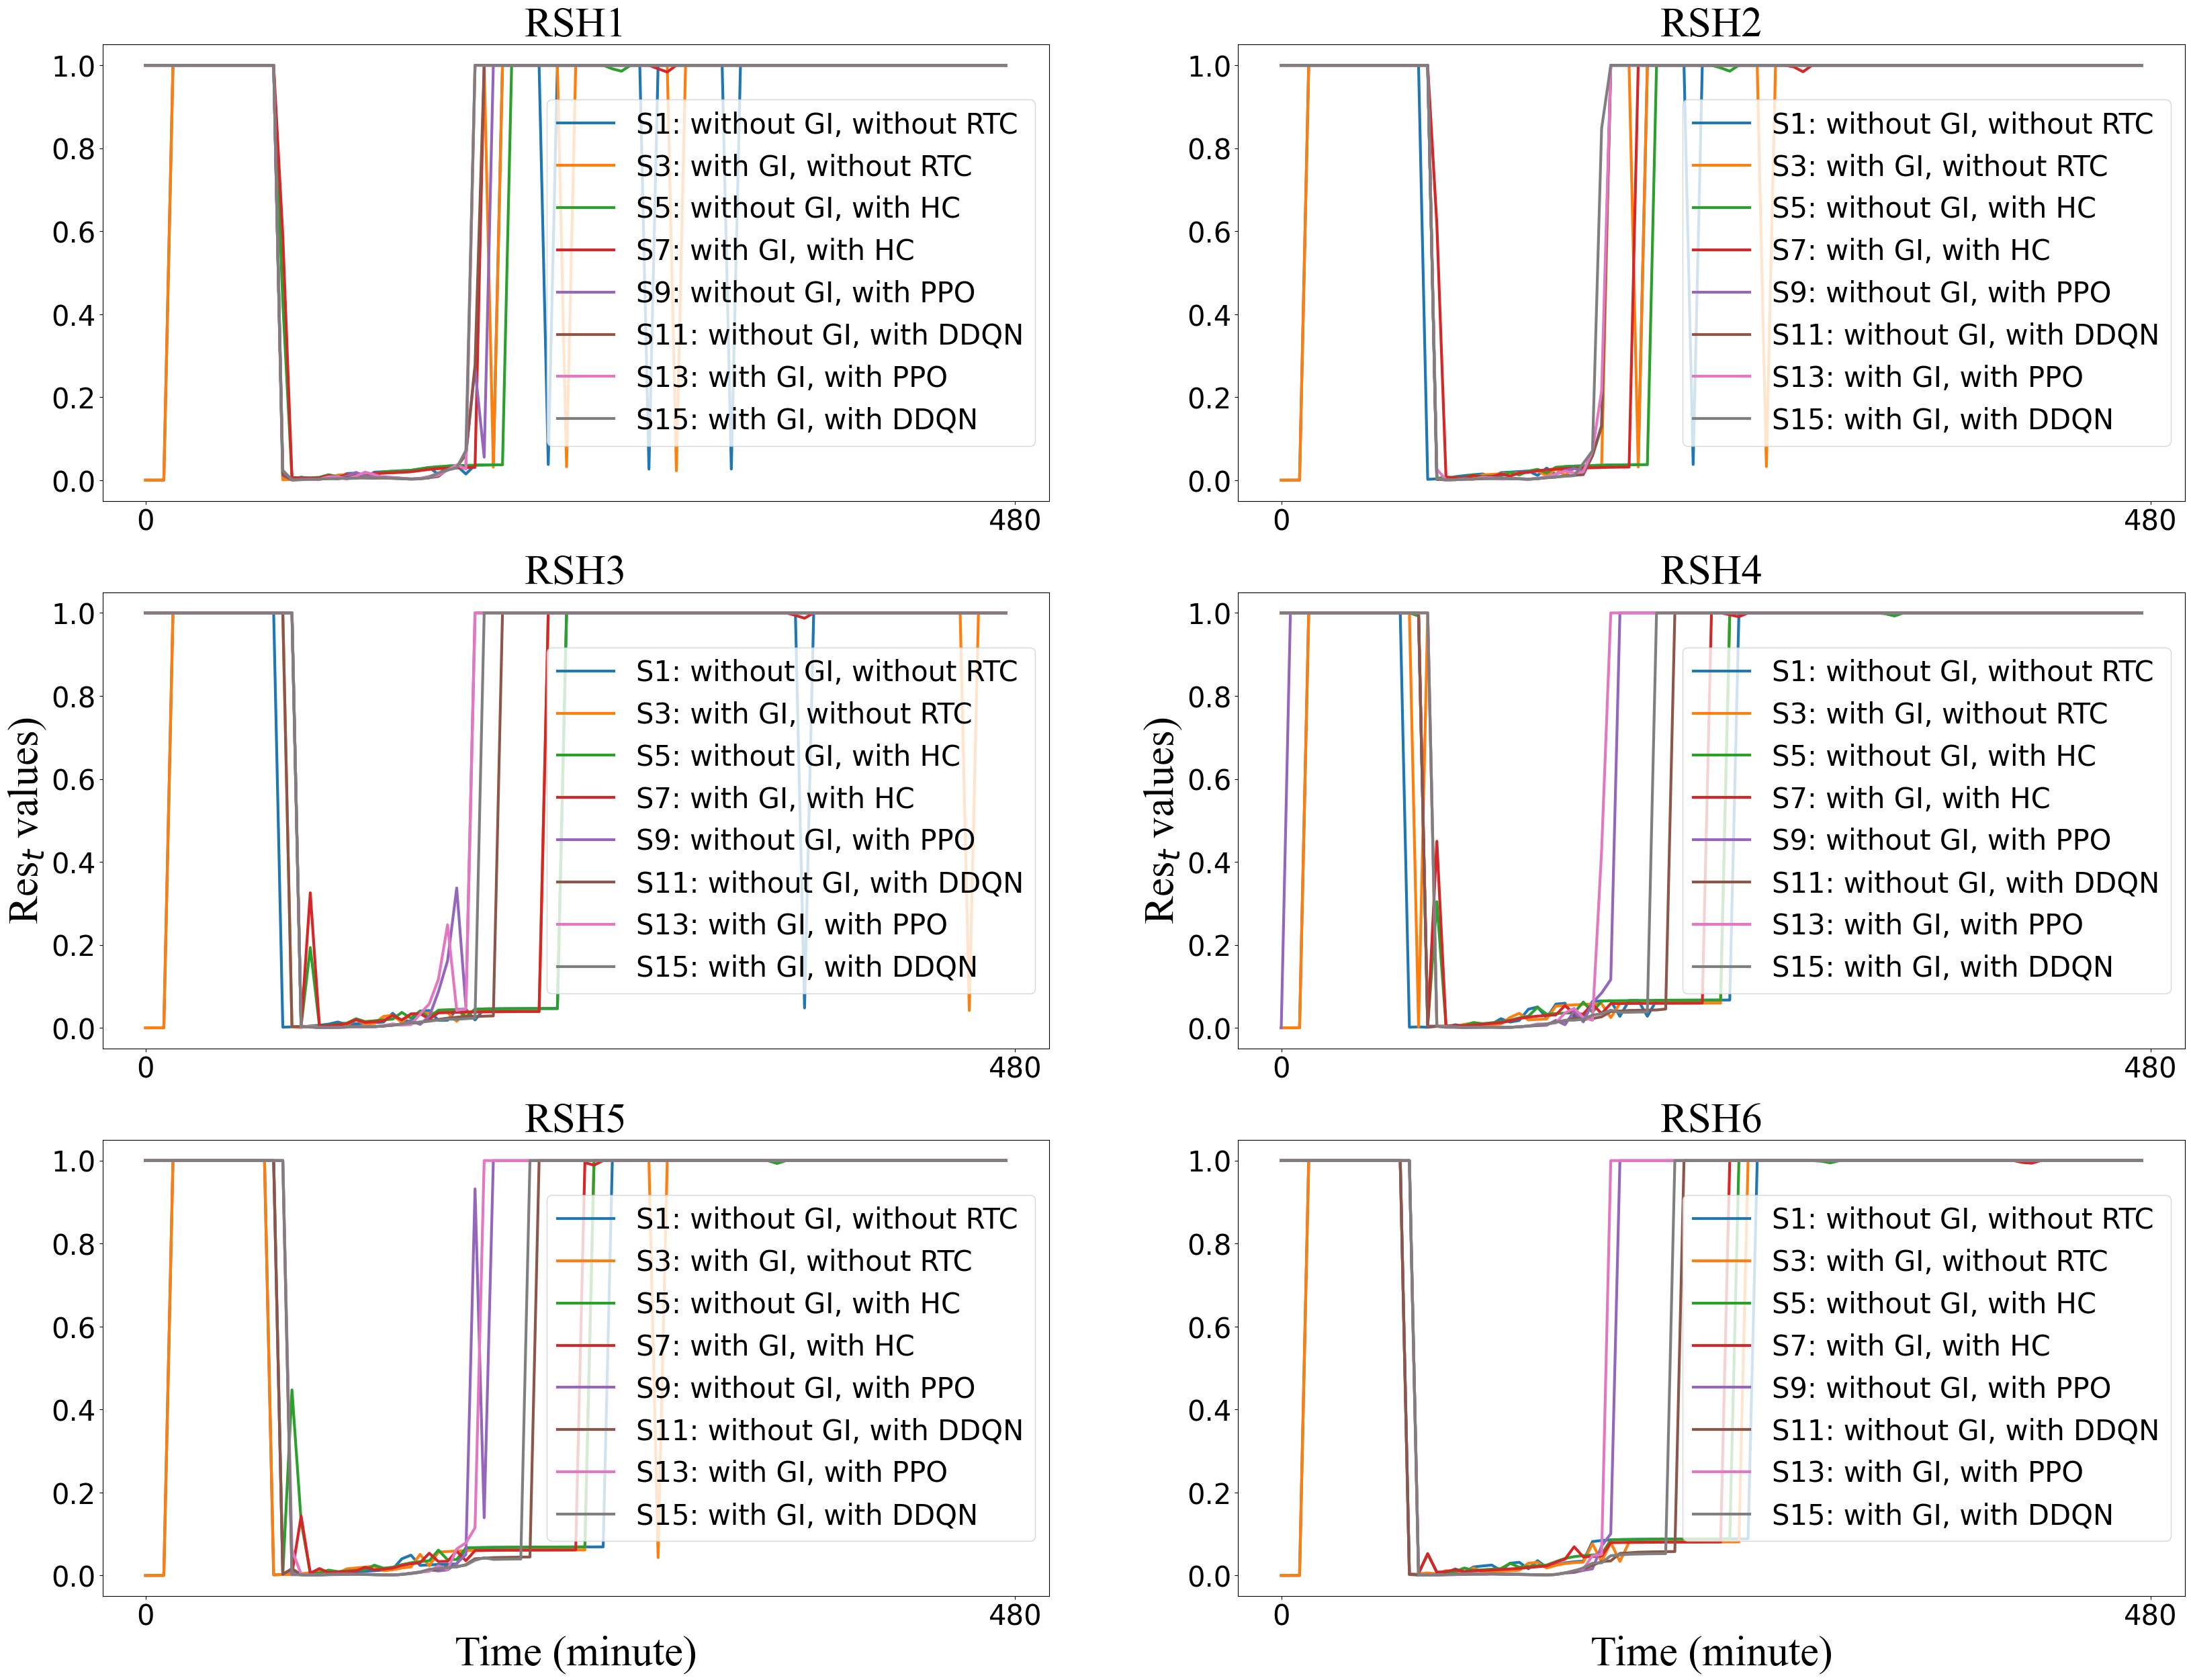

In [14]:
# RSH的所有控制过程数据： S1,3,5,7,9,11

font1 = {
    'family':'Times New Roman',
    'weight':'normal',
    'size':45,
}
items=['./Step3_1_S1-S8/S1/Results/',
       './Step3_1_S1-S8/S3/Results/',
       './Step3_1_S1-S8/S5/Results/',
       './Step3_1_S1-S8/S7/Results/',
       './Step4_RTC_PPO_noGI/PPO/Results/RSH/',
       './Step4_RTC_DDQN_noGI/DDQN/Results/RSH/',
       './Step4_RTC_PPO/PPO/Results/RSH/',
       './Step4_RTC_DDQN/DDQN/Results/RSH/']
names=['S1: without GI, without RTC',
       'S3: with GI, without RTC',
       'S5: without GI, with HC',
       'S7: with GI, with HC',
       'S9: without GI, with PPO',
       'S11: without GI, with DDQN',
       'S13: with GI, with PPO',
       'S15: with GI, with DDQN']

fig,ax=plt.subplots(3,2,figsize=(40,30))
i,j=0,0
for k in range(6):
    for s in range(len(items)):
        data=np.load(items[s]+str(k)+'.npy',allow_pickle=True).tolist()
        ax[i][j].plot(np.array(data['RES']), label=names[s],linewidth=3)
    
    ax[i][j].legend(fontsize=30)
    ax[i][j].tick_params(axis='y',labelsize=30)
    ax[i][j].tick_params(axis='x',labelsize=30)
    ax[i][j].set_title('RSH'+str(k+1),font=font1)
    ax[i][j].set_xticks([0,95],[0,480])
    if i==1:
        ax[i][j].set_ylabel('Res'+'$_{t}$'+' values)',font=font1)

    if i ==2:
        ax[i][j].set_xlabel('Time (minute)',font=font1)

    j+=1
    if j==2:
        i+=1
        j=0

plt.savefig('./Figs/RES1.png',dpi=300,bbox_inches='tight')